Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [29]:
df = pd.read_csv('train.csv')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

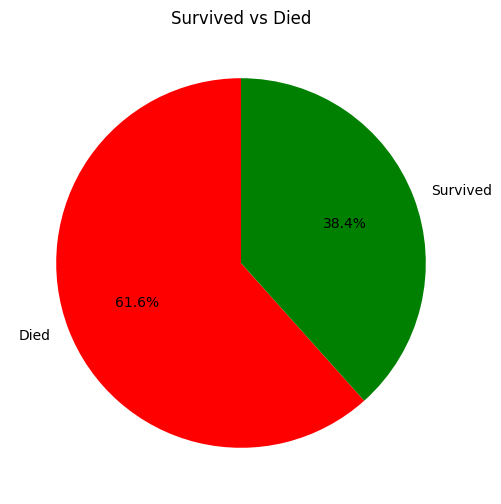

In [28]:
survival_counts = df['Survived'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=['Died', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Survived vs Died')
plt.show()


*прокоментуйте отримані візуалізації

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


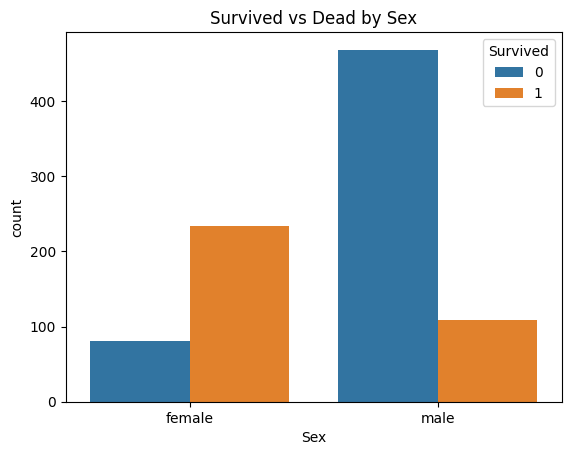

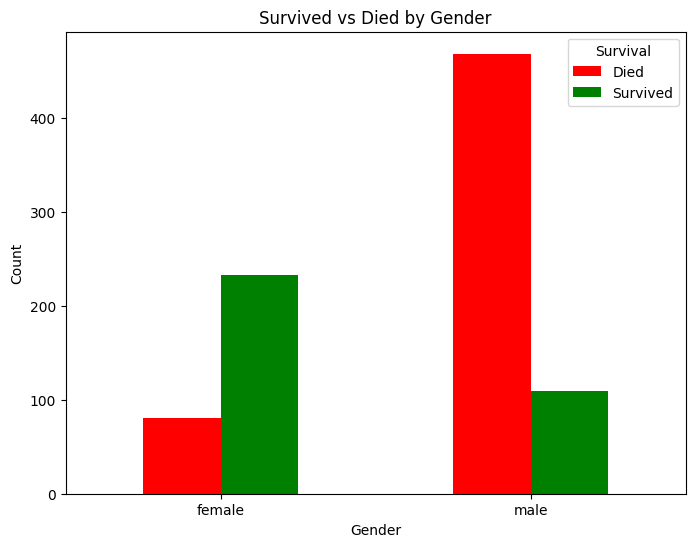

In [27]:
gender_survival = df.groupby(['Sex', 'Survived'], as_index=False).size()
gender_survival_pivot = gender_survival.pivot(index='Sex', columns='Survived', values='size')
gender_survival_pivot.columns = ['Died', 'Survived']  # Назва стовпців
gender_survival_pivot.plot(kind='bar', stacked=False, color=['red', 'green'], figsize=(8, 6))

plt.title('Survived vs Died by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survival', loc='upper right')

plt.show()


*прокоментуйте отримані візуалізації

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

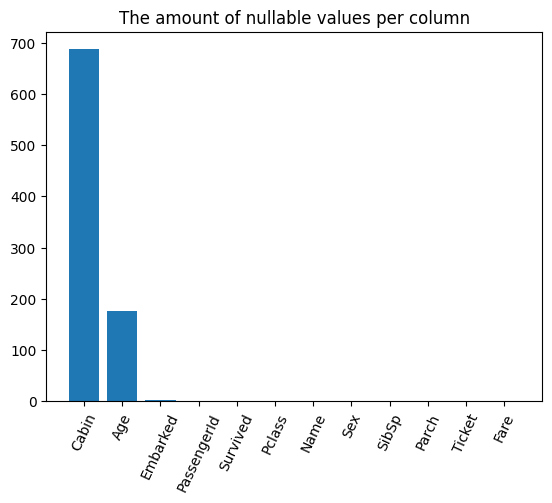

Missing values for each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
dtype: int64


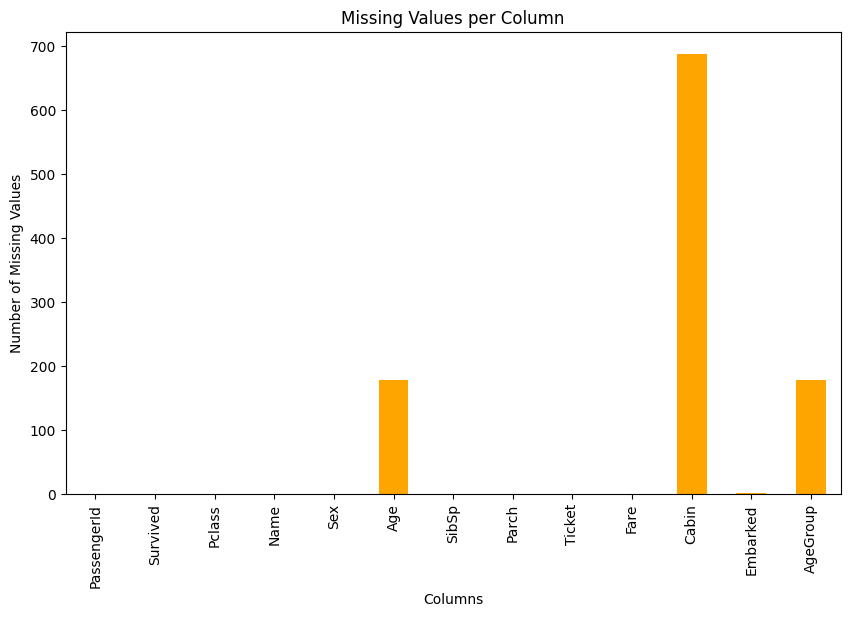

In [26]:
missing_values = df.isnull().sum()

print("Missing values for each column:\n", missing_values)

missing_values.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()


*прокоментуйте отримані візуалізації

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

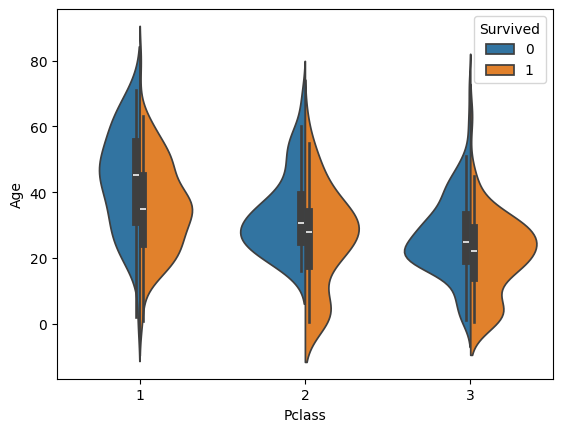

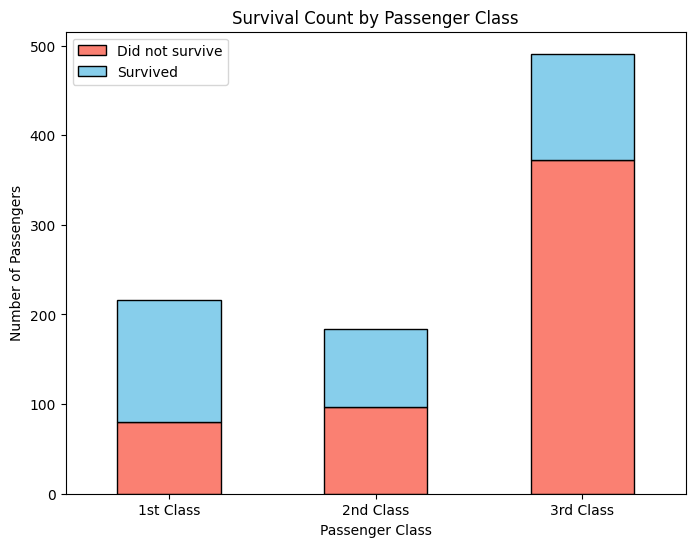

In [25]:
survival_by_class = df.groupby(['Pclass', 'Survived']).size().unstack()

survival_by_class.plot(kind='bar', stacked=True, figsize=(8, 6), color=['salmon', 'skyblue'], edgecolor='black')

plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=[0,1,2], labels=['1st Class', '2nd Class', '3rd Class'], rotation=0)
plt.legend(['Did not survive', 'Survived'])

plt.show()


*прокоментуйте отримані візуалізації

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


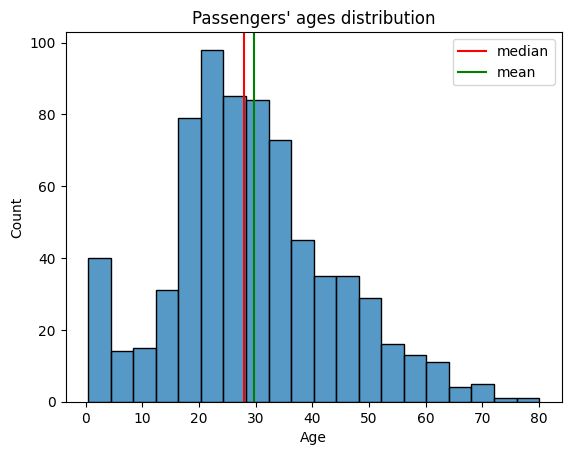

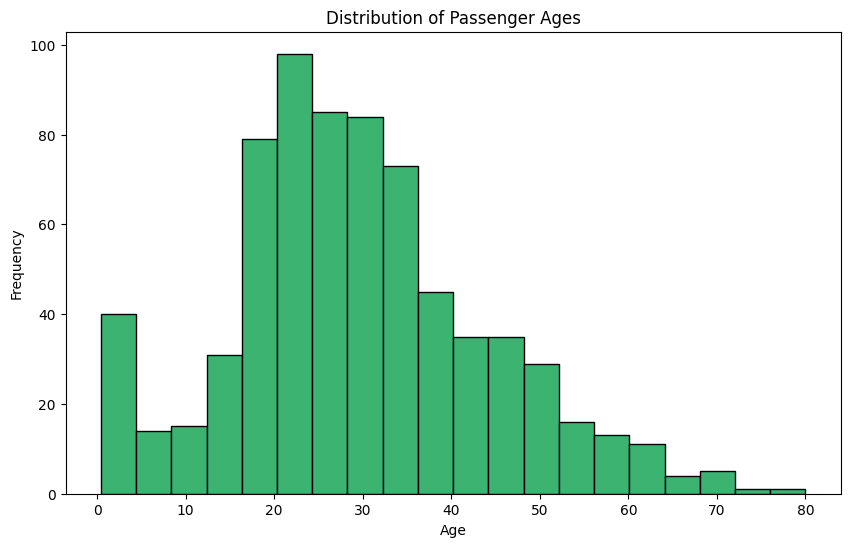

In [24]:
ages = df['Age'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, color='mediumseagreen', edgecolor='black')

plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

*прокоментуйте отримані візуалізації

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Were children more likely to survive than adults?

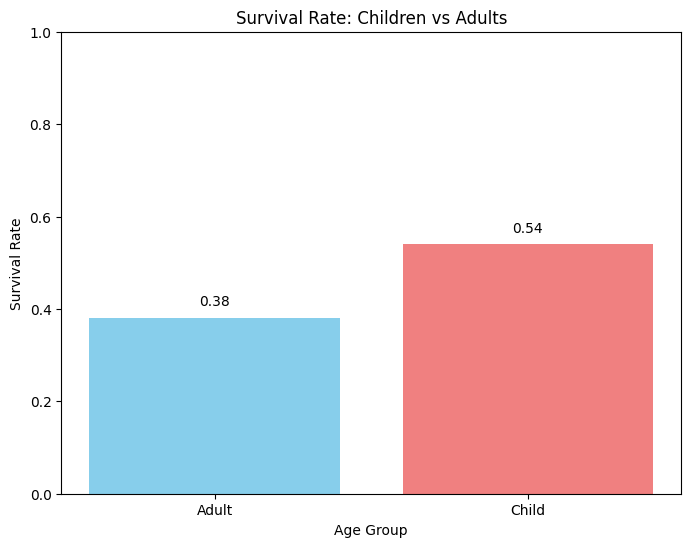

In [23]:
df['AgeGroup'] = df['Age'].apply(lambda age: 'Child' if age < 18 else 'Adult' if pd.notnull(age) else None)
df_filtered = df[df['AgeGroup'].notnull()]
survival_rates = df_filtered.groupby('AgeGroup')['Survived'].mean()
labels = survival_rates.index.tolist()
values = survival_rates.values.tolist()

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['skyblue', 'lightcoral'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Survival Rate: Children vs Adults')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)

plt.show()

*прокоментуйте отримані візуалізації

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

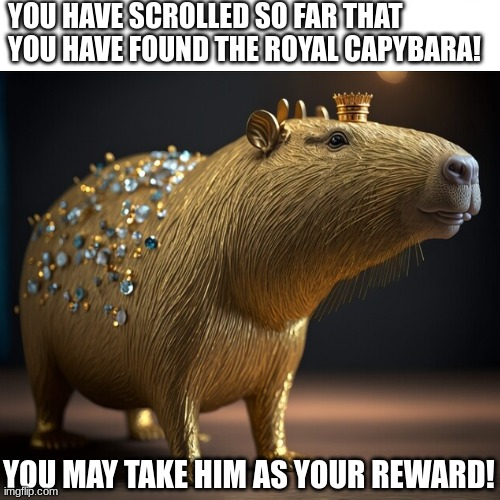